In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

In [66]:
df_avaliacoes = pd.read_csv('./datasets/dataset_avaliacoes.csv')

In [67]:
df_avaliacoes.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [68]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)

In [69]:
bag_of_words = vetorizar.fit_transform(df_avaliacoes.avaliacao)

In [70]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vetorizar.get_feature_names_out()
)
matriz_esparsa

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df_avaliacoes.sentimento , random_state=4978)

In [72]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train,y_train)
acuracia = regressao_logistica.score(X_test,y_test)
acuracia

0.7982456140350878

- Crie uma função chamada classificar_texto, que aceite três parâmetros: o nome do DataFrame, o nome da coluna contendo as avaliações de texto e o nome da coluna correspondente aos sentimentos;
- Utilize a classe CountVectorizer para transformar o texto em um vetor bag of words, com um número máximo de 50 features;
- Separe os dados em conjuntos de treino e teste utilizando train_test_split;
- Crie um modelo de regressão logística e ajuste-o aos dados de treino;
- Calcule e retorne a acurácia do modelo para os dados de teste;
- Retorne o valor da acurácia.

In [73]:
def classificar_texto(df_name, text_columns, senti_columns):
    bag_of_words = vetorizar.fit_transform(df_name[text_columns])
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df_name[senti_columns] , random_state=4978)
    regressao_logistica.fit(X_train,y_train)
    acuracia = regressao_logistica.score(X_test,y_test)
    return acuracia


In [74]:
print(classificar_texto(df_name=df_avaliacoes,text_columns='avaliacao',senti_columns='sentimento'))

0.7982456140350878


In [75]:
todas_palavras = [texto for texto in df_avaliacoes.avaliacao]

todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [76]:
todas_palavras = ' '.join([texto for texto in df_avaliacoes.avaliacao])

In [77]:
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [78]:
nuvem_palavras = WordCloud().generate(todas_palavras)

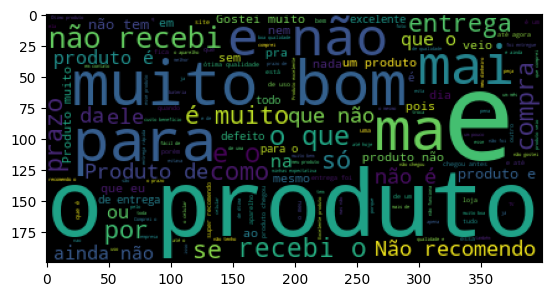

In [79]:
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

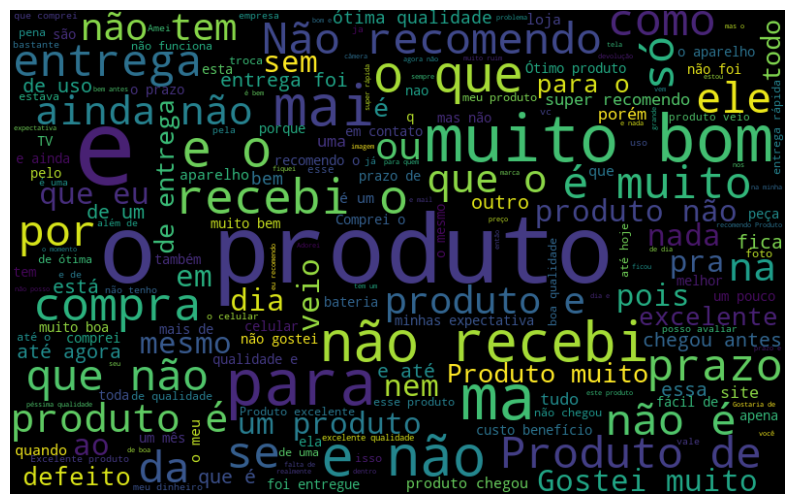

In [80]:

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

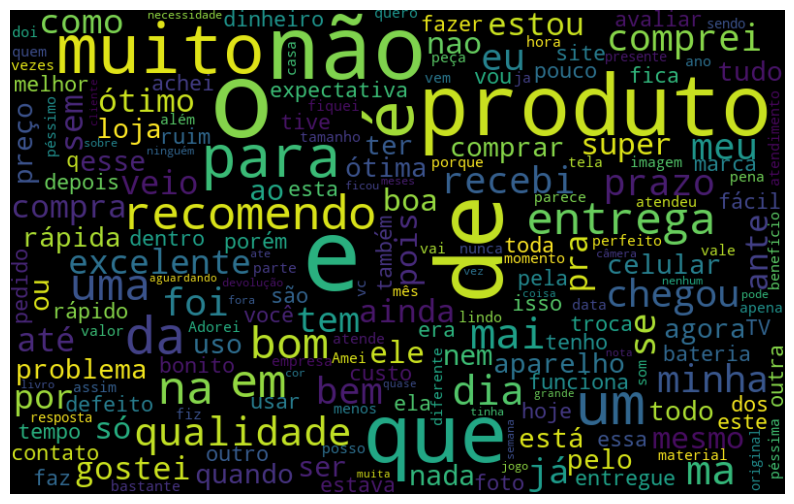

In [81]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  # Filtrando as resenhas com base no sentimento especificado
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  # Unindo todas as resenhas em uma única string
  texto_unido = ' '.join(texto_sentimento)

  # Criando e exibindo a nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

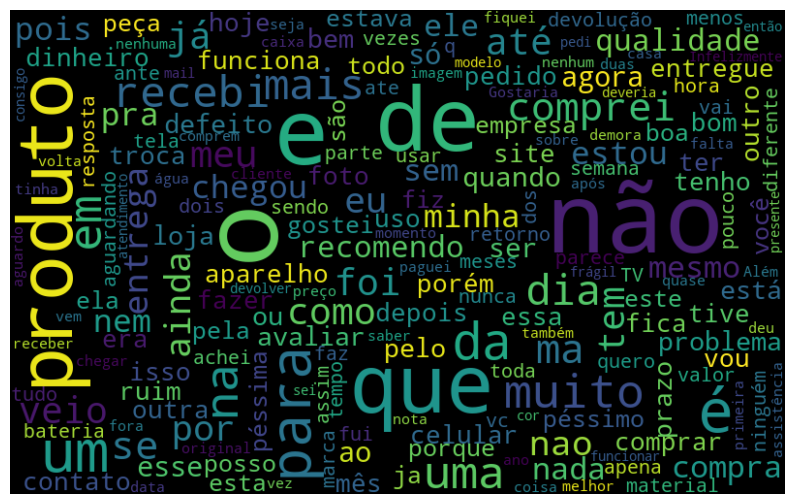

In [83]:

nuvem_palavras(df_avaliacoes, 'avaliacao', 'negativo')

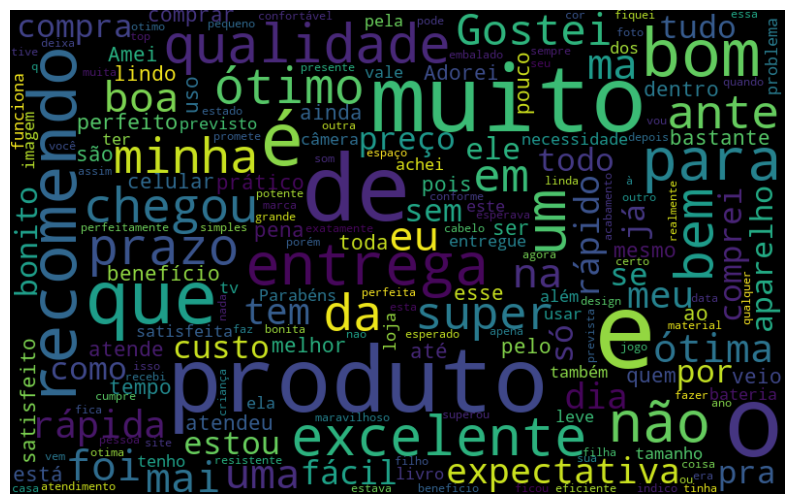

In [84]:
nuvem_palavras(df_avaliacoes, 'avaliacao', 'positivo')

In [85]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [86]:
frase = 'O produto é excelente e a entrega foi muito rápida!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [87]:
token_frase = token_espaco.tokenize(todas_palavras)

In [88]:
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [89]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [90]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [91]:
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [92]:
df_frequencia.nlargest(columns='Frequência', n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

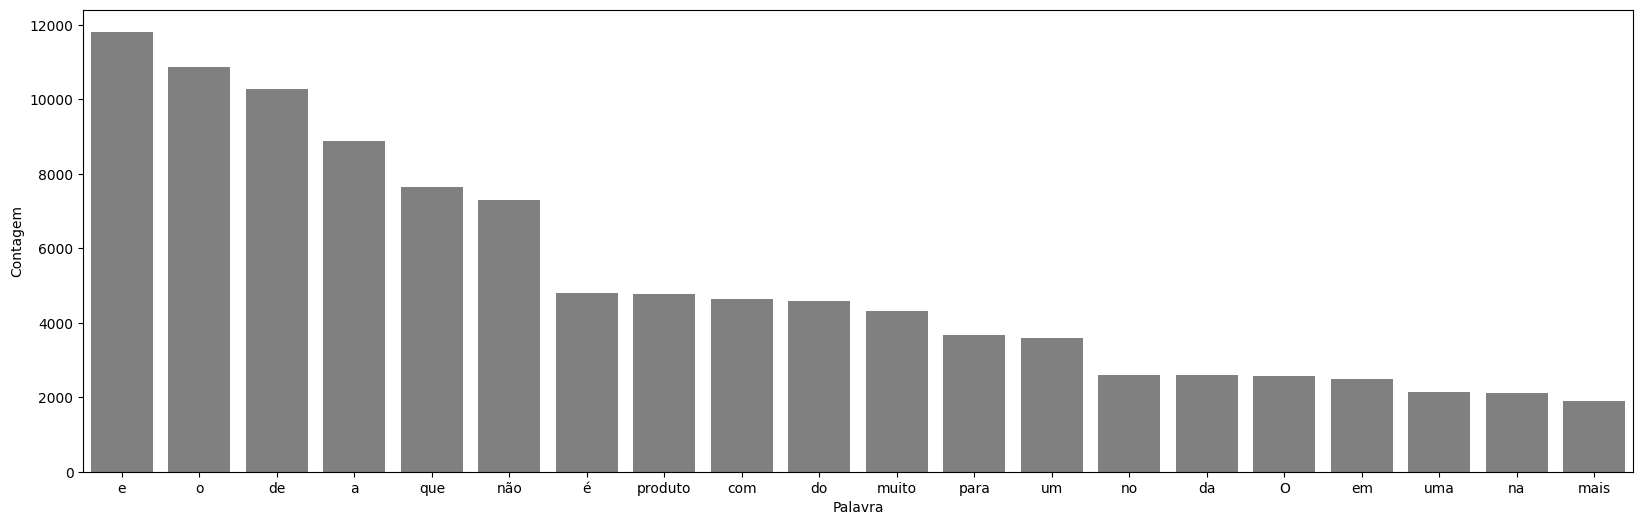

In [93]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Contagem')
plt.show()

#### Você deve criar uma função chamada grafico_frequencia que:
- Receba três parâmetros: o nome do DataFrame contendo a coluna com o texto, o nome da coluna de texto e a      quantidade de palavras mais frequentes a serem exibidas;
- Concatene todas as palavras presentes em uma determinada coluna de um DataFrame;
- Calcule a frequência de cada palavra usando a biblioteca NLTK;
- Converta os resultados em um DataFrame contendo duas colunas: "Palavra" e "Frequência";
- Selecione as palavras mais frequentes, de acordo com a quantidade especificada pelo usuário;
- Plote um gráfico de barras exibindo a frequência dessas palavras utilizando a biblioteca seaborn.

In [94]:
def grafico_frequencia(nome_df,column_text,quantidade):
    palavras_juntas = ' '.join([texto for texto in nome_df[column_text]])
    token_palavras = token_espaco.tokenize(palavras_juntas)
    frequencia = nltk.FreqDist(token_palavras)

    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n= quantidade),
                      x='Palavra', y='Frequência', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

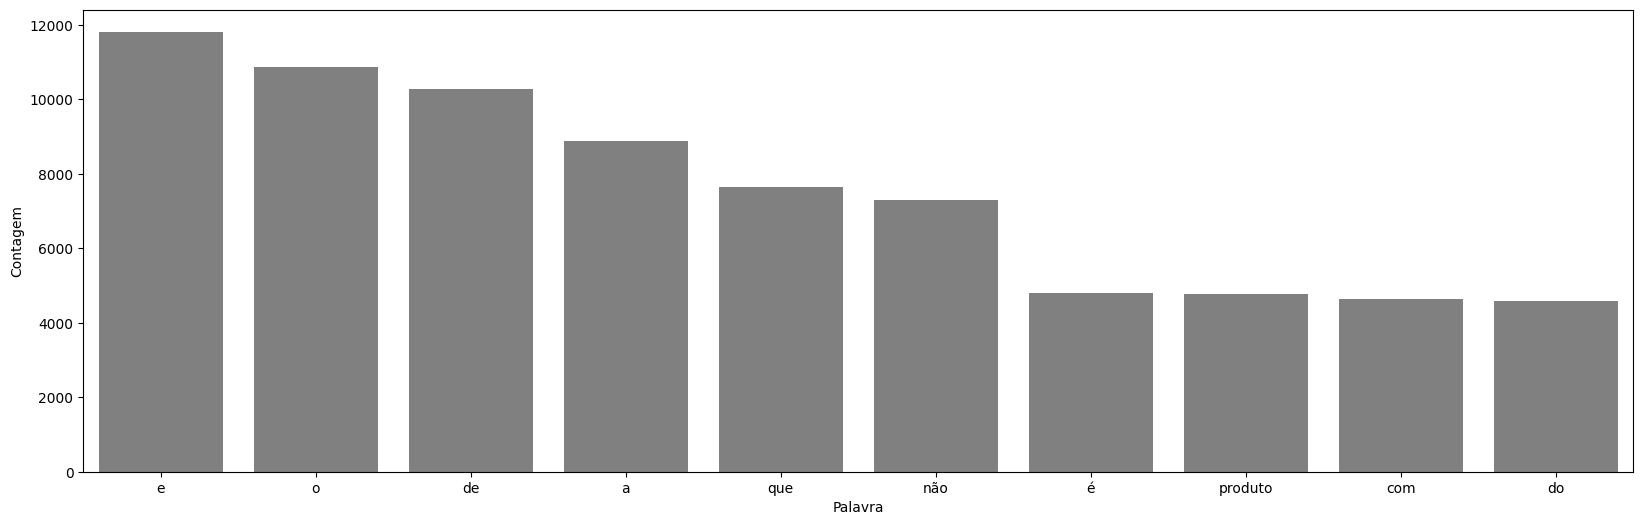

In [95]:
grafico_frequencia(nome_df= df_avaliacoes,column_text='avaliacao',quantidade=10) 

In [96]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [97]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [98]:

frase_processada = []

for opiniao in df_avaliacoes.avaliacao:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df_avaliacoes['tratamento_1'] = frase_processada

In [99]:
df_avaliacoes.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [100]:
classificar_texto(df_avaliacoes, 'tratamento_1', 'sentimento')

0.8108875128998968

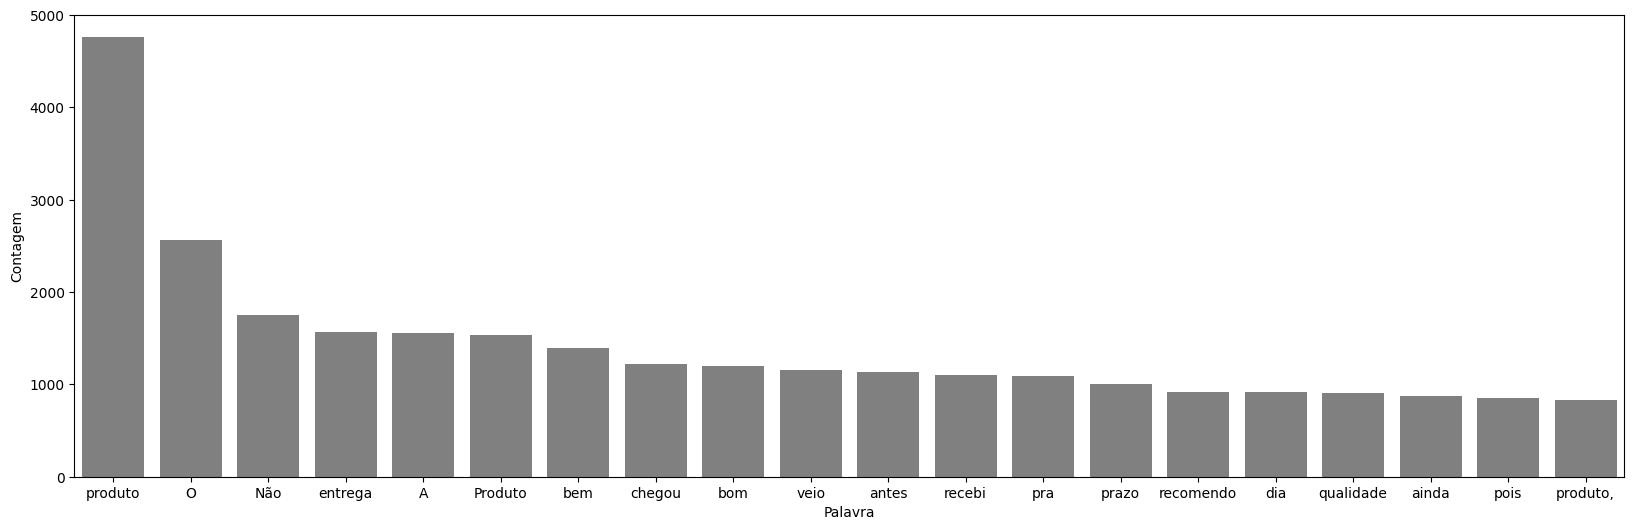

In [101]:
grafico_frequencia(df_avaliacoes, 'tratamento_1', 20)

In [102]:
# removendo pontuação

frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [103]:
frase_processada = []

for opiniao in df_avaliacoes['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df_avaliacoes['tratamento_2'] = frase_processada

In [104]:
df_avaliacoes.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

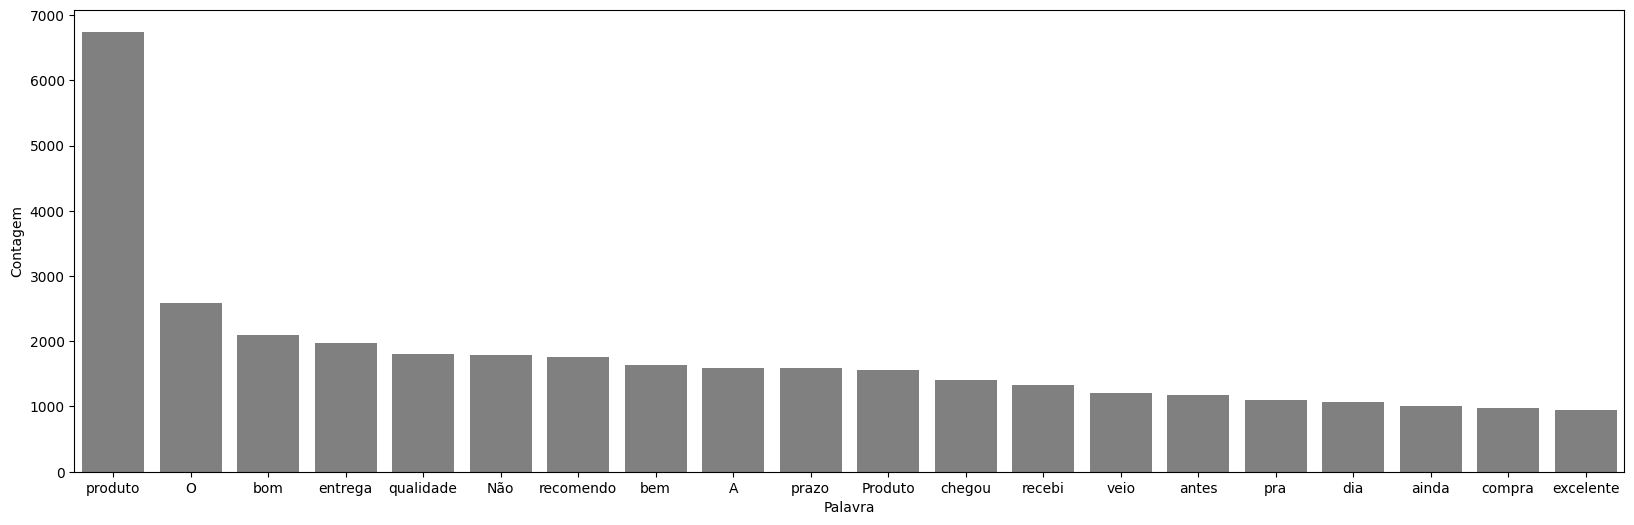

In [105]:
grafico_frequencia(df_avaliacoes, 'tratamento_2', 20)

In [106]:
frase =  'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [107]:
sem_acentos = [unidecode.unidecode(texto) for texto in df_avaliacoes['tratamento_2']]

In [108]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [109]:

df_avaliacoes['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in df_avaliacoes['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df_avaliacoes['tratamento_3'] = frase_processada

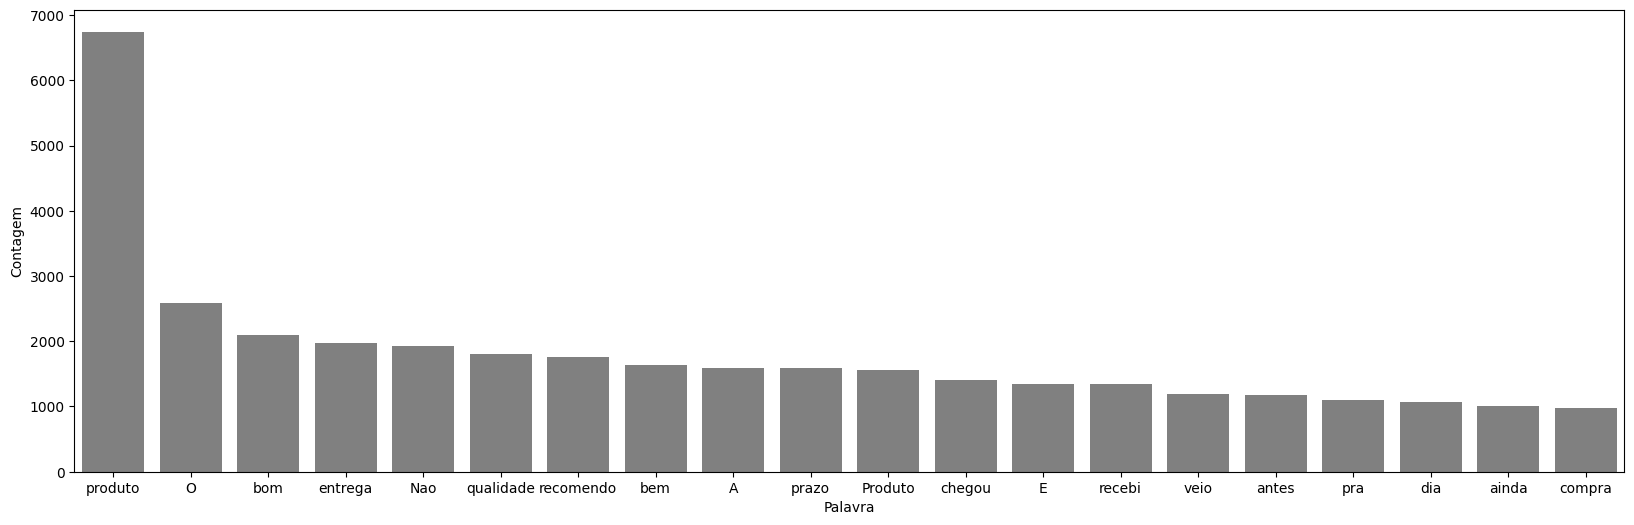

In [110]:
grafico_frequencia(df_avaliacoes, 'tratamento_3', 20)

In [111]:

frase_processada = []

for opiniao in df_avaliacoes['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df_avaliacoes['tratamento_4'] = frase_processada

In [112]:
classificar_texto(df_avaliacoes, 'tratamento_4', 'sentimento')

0.8374613003095975

### Simplificando as palavras

In [113]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostei')

'gost'

In [114]:
stemmer.stem('gostado')

'gost'

In [115]:

frase_processada = []

for opiniao in df_avaliacoes['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df_avaliacoes['tratamento_5'] = frase_processada

In [116]:
df_avaliacoes['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [117]:
df_avaliacoes['tratamento_5'][3]

'atend expect ach luz ruim nad dificult funcion'

In [118]:
classificar_texto(df_avaliacoes, 'tratamento_5', 'sentimento')

0.8511351909184727

### Determinando a importância das palavras

In [119]:
frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(),
             columns=tfidf.get_feature_names_out())

Comprei   produto   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [120]:
tfidf_bruto = tfidf.fit_transform(df_avaliacoes["avaliacao"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_bruto *100:.2f}%')

Acurácia do modelo: 79.54%


In [121]:
tfidf_tratados = tfidf.fit_transform(df_avaliacoes['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 85.14%


### Capturando contextos

In [122]:
frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [123]:

tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df_avaliacoes['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.22%


### Explorando a quantidade de features na vetorização

In [124]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df_avaliacoes['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.21%


In [136]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(df_avaliacoes['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')
     

Acurácia do modelo com 1000 features e ngrams: 91.85%


In [149]:
'''tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(df_avaliacoes['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df_avaliacoes['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')
'''   

"tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))\nvetor_tfidf = tfidf.fit_transform(df_avaliacoes['tratamento_5'])\nX_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df_avaliacoes['sentimento'], random_state=4978)\nregressao_logistica.fit(X_treino, y_treino)\nacuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)\nprint(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')\n"

##### nesse caso não possui diferença de 1000 features para o maximo

In [127]:

vetor_tfidf.shape

(15501, 114123)

In [137]:
# Executar novamente o código do tfidf_1000 antes de executar a célula abaixo:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)
     

In [138]:

pesos.nlargest(50, 0)

0
otim          7.808669
excel         7.449268
bom           5.990104
perfeit       5.078838
ador          5.034260
satisfeit     4.816196
rap           4.232814
lind          3.762726
ame           3.509609
maravilh      3.477517
boa           2.853934
expect        2.805352
bast          2.771108
surpreend     2.768510
sup           2.736121
recom         2.716303
gost          2.696611
bem           2.594271
facil         2.549400
conhec        2.494977
exat          2.457021
otim produt   2.280942
ant           2.250021
parab         2.242019
top           2.237539
ant praz      2.203972
obrig         2.099760
bonit         2.083441
facilit       2.025213
ideal         2.014983
amou          2.009027
gost produt   1.905817
produt excel  1.886860
unic          1.868087
necess        1.854163
atend         1.822574
incri         1.810025
tud           1.782914
bom produt    1.762308
acord         1.717719
feliz         1.682100
cheg ant      1.681544
conform       1.680358
produt otim   1.666303
sup recom     1.605002
melhor        1.584076
produt bom    1.553070
cert          1.542012
util          1.532237
duvid         1.525344

In [139]:
pesos.nsmallest(50,0)

0
pess         -4.632123
receb        -4.067055
ruim         -4.059795
frac         -3.694803
horri        -3.376634
defeit       -3.033516
fragil       -3.026329
decepcion    -2.899696
devolv       -2.893880
dinh         -2.692323
vei          -2.656039
pag          -2.417861
solt         -2.374786
quebr        -2.341997
ning         -2.289400
me           -2.270050
pess qual    -2.230152
receb produt -2.174370
tent         -2.135781
baix         -2.097195
devoluca     -2.093820
inferi       -2.082713
avali        -2.067197
insatisfeit  -2.063115
lig          -2.037871
rasg         -1.994937
baix qual    -1.984931
troc         -1.952566
queim        -1.881834
lent         -1.869798
fal          -1.868140
arrepend     -1.846433
fech         -1.836922
fot          -1.817790
porc         -1.810579
tr           -1.784346
cancel       -1.781236
hoj          -1.776404
mand         -1.772616
pi           -1.761921
sai          -1.756841
encaix       -1.736008
err          -1.730392
absurd       -1.728696
nad          -1.696266
produt       -1.694031
mes          -1.687258
mal          -1.685566
plac         -1.674567
diz          -1.634376

### Salvando e carregando o modelo

In [140]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [141]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

In [144]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()


def processar_avaliacao(avaliacao):
  # passo 1
  tokens = token_pontuacao.tokenize(avaliacao)

  # passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  # passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  # passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  # passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

In [145]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']
     

In [146]:

novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [147]:

novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [148]:

novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})

df_previsoes

Avaliação Sentimento previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agor...            negativo
4  Rastreando o pacote, achei que não fosse receb...            positivo

In [150]:
df_sorveteria = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/novas_avaliacoes.csv')

In [151]:
df_sorveteria.head()

ID_avaliacao                                          avaliacao
0          8558  Até que o sabor é bom. Muito melhor que tomar ...
1          3553  Nossa sério, absurdo, compro o produto com rec...
2          5590                                Bom custo benefício
3          6617  Saboroso e nutritivo. Tem me salvado nos dias ...
4          7987  Fiquei decepcionada com a situação, a embalage...

In [152]:
df_sorveteria.columns

Index(['ID_avaliacao', 'avaliacao'], dtype='object')

In [153]:
df_sorveteria.drop(columns=['ID_avaliacao'], axis=1, inplace=True)

In [154]:
avaliacoes_sorvetes = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [155]:
avaliacoes_sorvetes

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [159]:
novas_avaliacoes_tfidf = tfidf.transform(avaliacoes_sorvetes)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': avaliacoes_sorvetes,
    'Sentimento previsto': predicoes
})

df_previsoes

Avaliação Sentimento previsto
0                              otim produt sup recom            positivo
1                       entreg atras decepcion compr            negativo
2    satisfeit compr alem ter atend expect prec otim            positivo
3   horri produt cheg danific agor tent faz devoluca            negativo
4  rastre pacot ach receb lo poi dat prev send en...            positivo